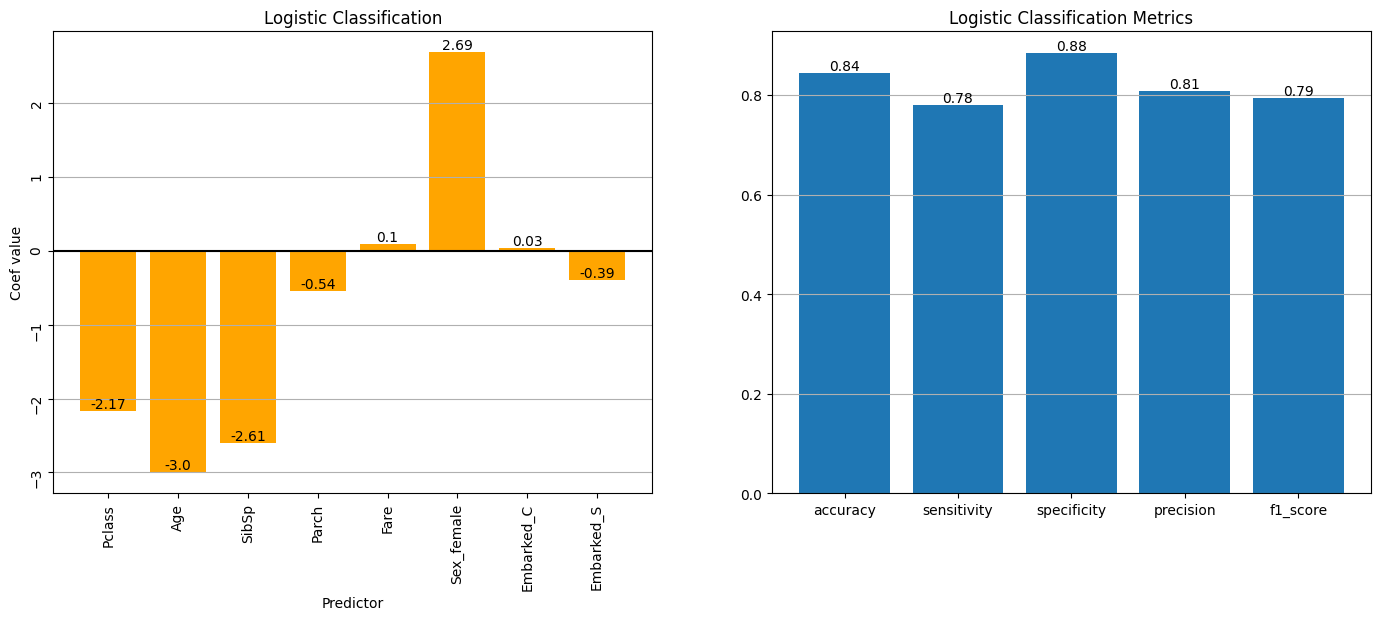

In [29]:
import importlib
from titanic import helper as hp
importlib.reload(hp)
from scipy.optimize import curve_fit
pd.set_option('display.expand_frame_repr', False) # display full data in terminal
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('/kaggle/titanic/eda/normalized_train.csv')
X = df.drop(['Survived', 'Sex_male', 'Embarked_Q'], axis=1) # for showing correlation matrix below
y = df['Survived']

rand_state = 64

X_train, X_val, y_train, y_val = skl.model_selection.train_test_split(X, y, random_state=rand_state)
## VARIABLES

C=10
rand_state=435

logit = LogisticRegression(C=C, max_iter=1000, random_state=rand_state).fit(X, y)

fig, ax = plt.subplots(1, 2, figsize=(17,6))

### Coef Graph

bars = ax[0].bar(X_train.columns, logit.coef_.ravel(), color="orange")
ax[0].set_ylabel("Coef value")
ax[0].set_xlabel("Predictor")
ax[0].set_title("Logistic Classification")
ax[0].grid(axis='y')
ax[0].tick_params(rotation=90)
ax[0].axhline(color='k')

hp.show_values_on_bar(bars, ax[0])

### Model Metric Graph

logit_predictions = logit.predict(X_val)

logit_metrics = hp.compute_confusion_matrix_metrics(y_val, logit_predictions)

bars = ax[1].bar(logit_metrics.keys(), logit_metrics.values())
ax[1].grid(axis='y')
ax[1].set_title("Logistic Classification Metrics")
hp.show_values_on_bar(bars, ax[1])


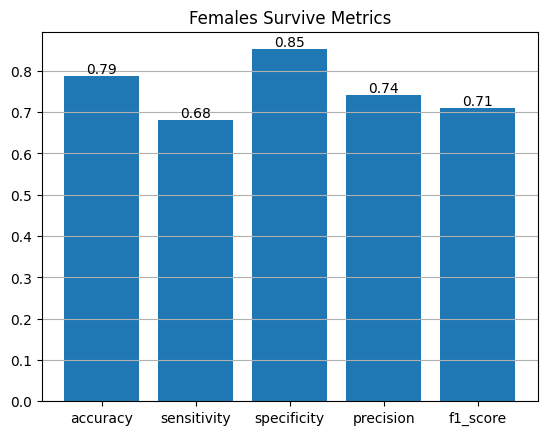

In [30]:
# comparison with simple model that predicts all females survive, and all males die (called the f_model)

def f_model(data):
    return data['Sex_female']

f_predictions = f_model(X)

f_metrics = hp.compute_confusion_matrix_metrics(y, f_predictions)

bars = plt.bar(f_metrics.keys(), f_metrics.values())
plt.grid(axis='y')
plt.title("Females Survive Metrics")
hp.show_values_on_bar(bars)

In [33]:
# re-fit on full training set, and export actual test predictions for submission

test_df = pd.read_csv('/kaggle/titanic/data/test.csv')

X_test, sibsp, age, sibsp_masked, predicted_ages, a, b = hp.impute_age(test_df)
X_test = hp.impute_fare(X_test)

cols_to_normalize = ['Pclass', 'Age', 'Parch', 'SibSp']

X_test[cols_to_normalize] = (X_test[cols_to_normalize] - X_test[cols_to_normalize].min()) / (X_test[cols_to_normalize].max() - X_test[cols_to_normalize].min())              # normalize to 0-1 scale
X_test['Fare'] = (X_test['Fare'] - X_test['Fare'].mean()) / X_test['Fare'].std()   # use z-score for Fare, since there are large outliers.

X_test = pd.get_dummies(X_test, columns=['Sex', 'Embarked'], drop_first=False, dtype=float)
X_test = X_test.drop(["Cabin", "Embarked_Q", "Name", "PassengerId", "Sex_male", 'Ticket'], axis=1)
# impute age and fare

norm_test_predictions = logit.predict(X_test)

prediction_csv = pd.DataFrame()
prediction_csv["PassengerId"] = test_df['PassengerId']
prediction_csv['Survived'] = norm_test_predictions
prediction_csv

prediction_csv.astype(int).to_csv('/kaggle/titanic/data/normalized_test_predictions.csv', index=False)



Fitted Params: 725.1 / x + 23.5
